<a href="https://colab.research.google.com/github/Ronaldo-khagokpam/mca_major_project/blob/main/phee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip phee11.zip

Archive:  phee11.zip
   creating: phee11/
   creating: phee11/test/
   creating: phee11/test/khudei/
  inflating: phee11/test/khudei/kh10.jpg  
  inflating: phee11/test/khudei/kh12.jpg  
  inflating: phee11/test/khudei/kh14.jpg  
  inflating: phee11/test/khudei/kh15.jpg  
  inflating: phee11/test/khudei/kh16.jpg  
  inflating: phee11/test/khudei/kh17.jpg  
  inflating: phee11/test/khudei/kh19.jpg  
  inflating: phee11/test/khudei/kh2.jpeg  
  inflating: phee11/test/khudei/kh20.jpg  
  inflating: phee11/test/khudei/kh21.jpg  
  inflating: phee11/test/khudei/kh22.jpg  
  inflating: phee11/test/khudei/kh24.jpg  
  inflating: phee11/test/khudei/kh25.jpg  
  inflating: phee11/test/khudei/kh27.jpg  
  inflating: phee11/test/khudei/kh28.jpg  
  inflating: phee11/test/khudei/kh3.jpeg  
  inflating: phee11/test/khudei/kh30.png  
  inflating: phee11/test/khudei/kh31.jpg  
  inflating: phee11/test/khudei/kh34.jpg  
  inflating: phee11/test/khudei/kh35.png  
  inflating: phee11/test/khudei/kh37.pn

In [ ]:
# pip install tensorflow streamlit matplot numpy pandas
import os
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import torch
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms


In [ ]:
data_train_path = 'phee11/train'
data_test_path = 'phee11/test'
data_val_path = 'phee11/validation'



In [ ]:
img_width=180
img_height=180
 #'''means all images will be resized to 180×180 pixels when loaded using image_dataset_from_directory.'''

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,             # Path to the directory containing the image data
    shuffle=True,                # Shuffle the dataset
    image_size=(img_width, img_height),  # Resize all images to this size
    batch_size=32,               # Number of images per batch
    validation_split=False       # No validation split; load all images for training
)

Found 2349 files belonging to 8 classes.


In [ ]:
phee_classes = data_train.class_names
phee_classes
 #retrieves the list of class names automatically inferred by image_dataset_from_directory. phee_classes

['khudei',
 'kokyet',
 'leirumphee',
 'phanekmapanaibi',
 'phigephanek',
 'raniphee',
 'thamballeikhok',
 'wangkheiphee']

In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,#This is the path to the directory containing the test images
                                                       image_size=(img_height,img_width),#This resizes the images to a specific size, (img_height, img_width), before they are fed into the model.
                                                       batch_size=32,#Sets the number of images to load in each batch during evaluation. 32 images per batch will be loaded at a time for evaluation.
                                                        shuffle=False,#Controls whether the dataset should be shuffled before being passed to the model.
                                                       validation_split=False)#  the entire dataset is being used as the test set.

Found 444 files belonging to 8 classes.


In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,#This is the path to the directory containing the validation images
                                                       image_size=(img_height,img_width),#This resizes the images to a specific size, (img_height, img_width), before they are fed into the model.
                                                       batch_size=32,#Sets the number of images to load in each batch during evaluation. 32 images per batch will be loaded at a time for evaluation.
                                                        shuffle=False,#Controls whether the dataset should be shuffled before being passed to the model.
                                                       validation_split=False)#  the entire dataset is being used as the validation set.

Found 444 files belonging to 8 classes.


In [ ]:
model = Sequential([
    layers.Rescaling(1./255),#Normalizes pixel values from [0, 255] to [0, 1] (which helps with faster and more stable training).
    layers.Conv2D(16, 3, padding='same', activation='relu'),#Applies 16 filters (3x3) over the input image.padding='same' preserves the spatial dimensions.Uses ReLU activation.
    layers.MaxPooling2D(),#Downsamples the output of the conv layer (usually 2x2 by default), reducing computation and extracting dominant features.
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),#Converts 3D feature maps into a 1D vector, preparing for the dense (fully connected) layers.
    layers.Dropout(0.2),#Randomly turns off 20% of the neurons during training to reduce overfitting.
    layers.Dense(128),#A fully connected layer with 128 units (neurons).
    layers.Dense(len(phee_classes))#Final output layer.Number of neurons = number of classes in phee_classes.
])

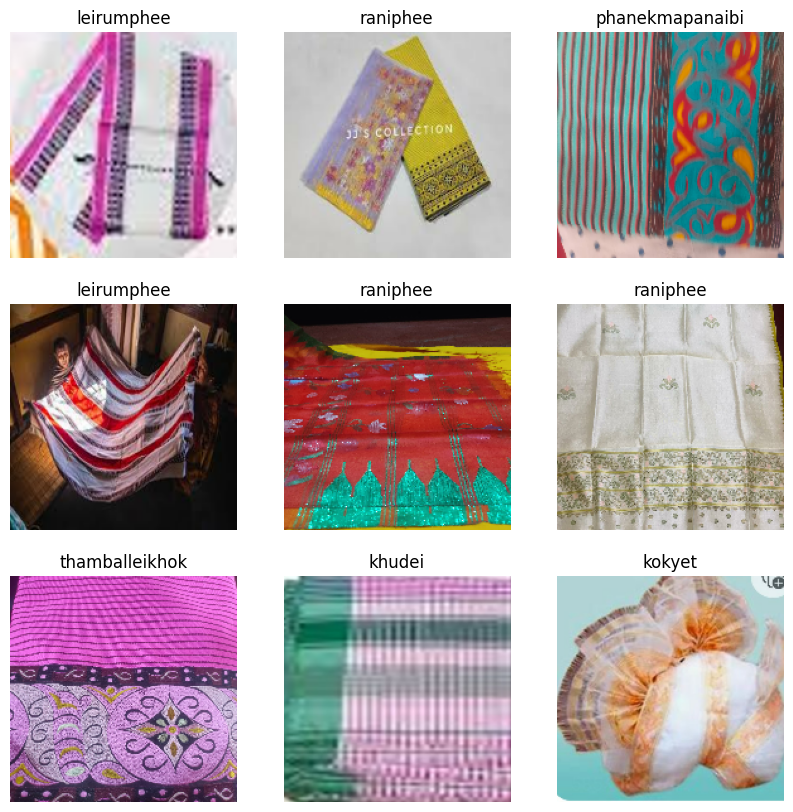

In [ ]:
''' Outcome
This code will create a 3x3 grid of the first 9 images in data_train, with each image labeled with its corresponding class from phee_classes.'''
plt.figure(figsize=(10,10))#size of 10x10 inches
for image, labels in data_train.take(1):#This grabs the first batch of images and labels from data_train (tf.data.Dataset).image will be a batch of images with shape (batch_size, height, width, channels), and labels will be the corresponding class labels for those images.
    for i in range(9):#This loops through the first 9 images in the batch (i ranges from 0 to 8).
        plt.subplot(3,3,i+1)# creates a 3x3 grid of subplots (9 total) and places each image in one of the subplots.
        plt.imshow(image[i].numpy().astype('uint8'))#displays the image in the current subplot. .astype('uint8'): Converts the image data to an unsigned 8-bit integer format (0-255) so it can be properly displayed.
        plt.title(phee_classes[labels[i]])#Uses the label for the i-th image to look up the corresponding class name from phee_classes (a list of class names).
        plt.axis('off')#Disables the axis labels and ticks for a cleaner image display.

In [ ]:
# Data Autotune in machine learning refers to the process of automatically selecting the best hyperparameters for a model, ensuring it performs optimally.
#The purpose of auto-tuning is to streamline the model training process by finding the ideal combination of parameters without requiring extensive manual tuning.
AUTOTUNE = tf.data.AUTOTUNE
train_ds = data_train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = data_val.cache().prefetch(buffer_size = AUTOTUNE)


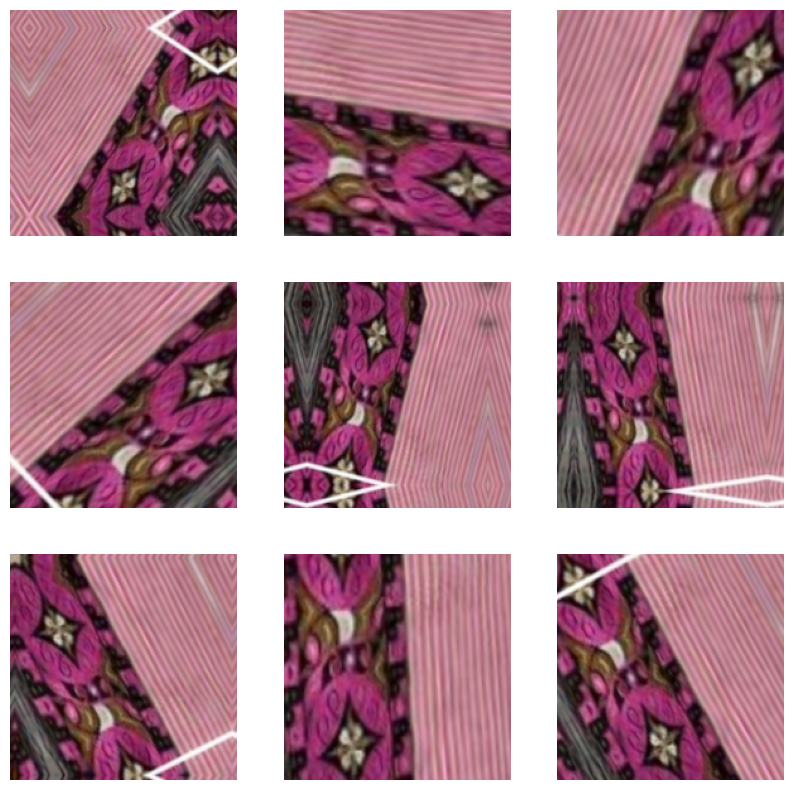

In [ ]:


img_size = 224  # Set your image size here (adjust if needed)

# Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),#randomly flips the image left-to-right and defines the expected shape of the input image: 224x224 with 3 color channels (RGB).
    layers.RandomRotation(0.3),#randomly rotates the image by ±30% of a full circle.
    layers.RandomZoom(0.3)#randomly zooms the image in or out by 30%.
])

plt.figure(figsize=(10, 10))

# Apply augmentation and plot 9 different augmented versions of the **same** image
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")
plt.show()


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
epochs_size = 10 #Sets the number of training epochs to 40.An epoch is one full pass through the entire training dataset.


history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)
''' model.fit(...):
Trains the model on data_train (tf.data.Dataset or similar object).

Evaluates performance on data_val at the end of each epoch.

Runs for 30 epochs, as defined above.
output meaning
Epoch 1/30: This is the first out of 30 training cycles.

5/5: 5 batches (sets of data) were processed in this epoch.

loss: The training loss (how wrong the model is during training).

accuracy: The training accuracy (how right the model is during training).

val_loss: The validation loss (how wrong the model is on unseen data).

val_accuracy: The validation accuracy (how right the model is on unseen data).'''

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.3044 - loss: 2.4423 - val_accuracy: 0.5405 - val_loss: 1.1875
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6107 - loss: 1.0531 - val_accuracy: 0.7477 - val_loss: 0.7875
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7652 - loss: 0.7074 - val_accuracy: 0.8423 - val_loss: 0.5249
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8475 - loss: 0.4761 - val_accuracy: 0.8986 - val_loss: 0.3278
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9013 - loss: 0.2986 - val_accuracy: 0.9099 - val_loss: 0.3412
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9152 - loss: 0.2693 - val_accuracy: 0.9369 - val_loss: 0.2217
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9401 - loss: 0.2022 - val_accuracy: 0.9167 - val_loss: 0.2271
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9487 - loss: 0.1696 - val_accuracy: 0.9505 - val_

' model.fit(...):\nTrains the model on data_train (tf.data.Dataset or similar object).\n\nEvaluates performance on data_val at the end of each epoch.\n\nRuns for 30 epochs, as defined above.\noutput meaning\nEpoch 1/30: This is the first out of 30 training cycles.\n\n5/5: 5 batches (sets of data) were processed in this epoch.\n\nloss: The training loss (how wrong the model is during training).\n\naccuracy: The training accuracy (how right the model is during training).\n\nval_loss: The validation loss (how wrong the model is on unseen data).\n\nval_accuracy: The validation accuracy (how right the model is on unseen data).'

In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,969,018 (45.66 MB)

 Trainable params: 3,989,672 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,979,346 (30.44 MB)

Text(0.5, 1.0, 'Loss')

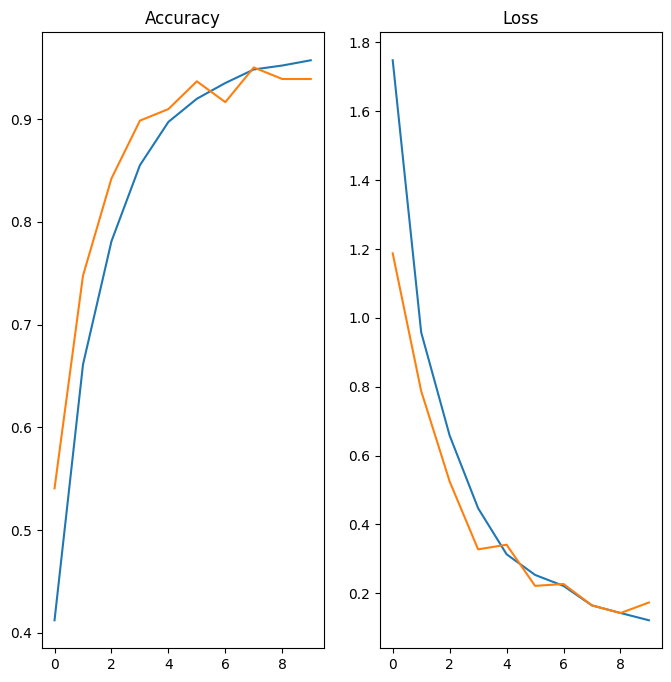

In [ ]:
epochs_range = range(epochs_size)  #Creates a range of numbers from 0 to epochs_size - 1.
plt.figure(figsize=(8,8))  #Sets the size of the overall figure — 8 inches by 8 inches.

plt.subplot(1,2,1)#Creates the first subplot (1 row, 2 columns, 1st plot) — this will be for accuracy

#Plots training accuracy and validation accuracy over epochs.
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)#Moves to the second subplot — for loss.
#Plots training loss and validation loss over epochs.
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

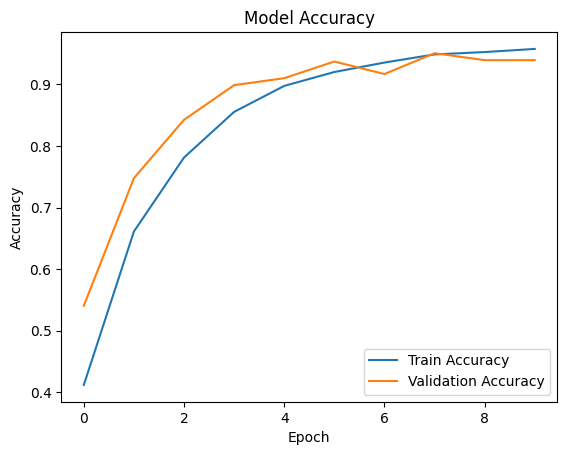

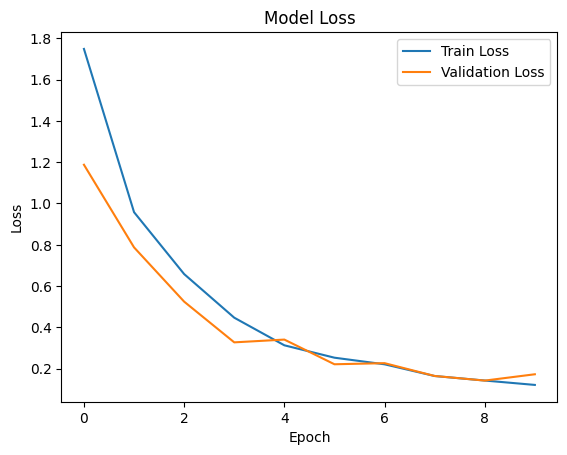

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
model.predict(data_train)
#This array has shape (n_samples, n_features):

#Each row corresponds to one input sample.

#Each column corresponds to a predicted value or feature for that sample.'''

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step


array([[ 0.01328018,  0.15258189, -0.12323947, ...,  0.06203508,
        -0.14889228, -0.34481943],
       [ 0.02682143,  0.13679585,  0.00770465, ...,  0.0592331 ,
        -0.24980107, -0.545822  ],
       [-0.04627685,  0.15470655, -0.0348975 , ...,  0.18235096,
        -0.45172057, -0.74413866],
       ...,
       [ 0.12313381,  0.20071499, -0.12794146, ...,  0.21285798,
        -0.20581377, -0.5696362 ],
       [ 0.00513481,  0.12797104, -0.12153628, ..., -0.02109347,
        -0.2416667 , -0.49516577],
       [-0.05509876,  0.04651065, -0.11917806, ...,  0.15216506,
        -0.2062779 , -0.47231522]], dtype=float32)

In [ ]:
model.predict(data_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step


array([[ 11.198924  ,  -9.4081135 ,  -2.4229674 , ...,   3.7827637 ,
          1.1532457 ,  -5.670505  ],
       [ 12.4924135 ,   4.415742  ,  -1.6390996 , ...,   4.025267  ,
        -11.207072  ,   0.29762524],
       [  6.7026415 ,  -4.489466  ,  -0.85721284, ...,   2.2066333 ,
         -2.0078237 ,  -0.68074054],
       ...,
       [  1.7285702 ,  -1.2832712 ,  -2.2286885 , ...,   1.1861327 ,
         -7.4549375 ,   6.406294  ],
       [  1.8487874 ,   1.2223568 ,  -1.5346743 , ...,  -0.7358976 ,
         -5.7579446 ,   6.47312   ],
       [  1.8487874 ,   1.2223568 ,  -1.5346743 , ...,  -0.7358976 ,
         -5.7579446 ,   6.47312   ]], dtype=float32)

In [ ]:
model.predict(data_val)

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step


array([[ 11.198924  ,  -9.4081135 ,  -2.4229674 , ...,   3.7827637 ,
          1.1532457 ,  -5.670505  ],
       [  9.781407  ,  -1.2773867 ,   3.0524385 , ...,   1.9612375 ,
         -3.7083774 ,  -2.6222782 ],
       [ 12.4924135 ,   4.415742  ,  -1.6390996 , ...,   4.025267  ,
        -11.207072  ,   0.29762524],
       ...,
       [  1.7285702 ,  -1.2832712 ,  -2.2286885 , ...,   1.1861327 ,
         -7.4549375 ,   6.406294  ],
       [  1.8487874 ,   1.2223568 ,  -1.5346743 , ...,  -0.7358976 ,
         -5.7579446 ,   6.47312   ],
       [  1.8487874 ,   1.2223568 ,  -1.5346743 , ...,  -0.7358976 ,
         -5.7579446 ,   6.47312   ]], dtype=float32)

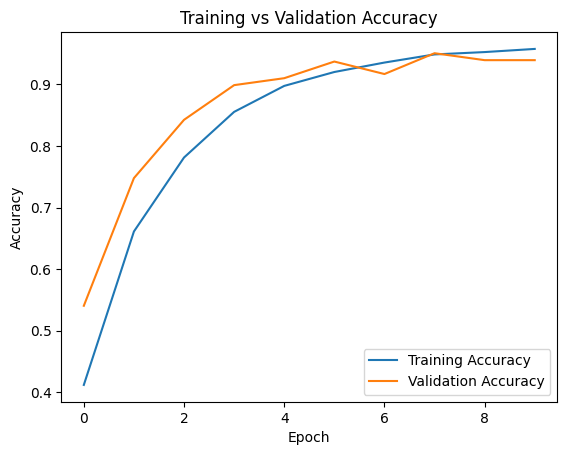

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.evaluate(data_train)#it is used to evaluate the performance of your trained Keras model on the training dataset (data_train).


74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 445ms/step - accuracy: 0.9442 - loss: 0.1712


[0.1334141045808792, 0.954023003578186]

In [ ]:
model.evaluate(data_test)#IT is used to evaluate the performance of your trained Keras model on a test dataset.



14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.9510 - loss: 0.1394


[0.17380289733409882, 0.9391891956329346]

In [ ]:
model.evaluate(data_val)#it is used to evaluate the performance of your trained model on the validation dataset (data_val).


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 347ms/step - accuracy: 0.9510 - loss: 0.1377


[0.17329582571983337, 0.9391891956329346]

In [ ]:
def classify_images(image_path):#Loads the image from the given path (image_path).
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))#Resizes the image to 180x180 pixels to match the expected input size of the model.
    input_image_array = tf.keras.utils.img_to_array(input_image)#Converts the PIL image into a NumPy array (with shape (180, 180, 3)) so it can be processed by the model.
    input_image_exp_dim = tf.expand_dims(input_image_array,0)
    predictions = model.predict(input_image_exp_dim)  #Runs the image through the model and gets the raw output logits (unnormalized scores).

    result = tf.nn.softmax(predictions[0])#Applies the softmax function to convert the logits into probabilities that sum to 1.

    outcome = 'The Manipuri Phee belongs to ' + phee_classes[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [ ]:
classify_images('t18.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


'The Manipuri Phee belongs to thamballeikhok with a score of 97.72152'

In [ ]:
model.save('PheeRecogModel8.h5')#it is used to save a trained Keras model (using the TensorFlow or standalone Keras library) in the HDF5 (Hierarchical Data Format version 5) (.h5) format

In [ ]:
model.save('PheeRecogModel8.keras')#It's the new standard supported natively by Keras and TensorFlow going forward.